In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("large_social_media_dataset.csv")
df

,post_id,post_type,likes,comments,shares,followers,post_hour,hashtag_count,reach
0,1,Text,997,244,1098,99144,14,6,202469
1,2,Story,7632,831,1189,95751,18,14,157047
2,3,Reel,7337,1340,1212,24306,21,9,66677
3,4,Story,9748,924,2125,37401,9,2,153302
4,5,Story,8851,294,2994,17543,11,11,152685
...,...,...,...,...,...,...,...,...,...
1995,1996,Image,1930,1406,870,65091,3,12,58973
1996,1997,Story,4198,1138,100,79061,22,8,241972
1997,1998,Image,248,893,1412,75316,1,6,44653
1998,1999,Story,214,1307,2739,11851,2,11,172849


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   post_id        2000 non-null   int64 
 1   post_type      2000 non-null   object
 2   likes          2000 non-null   int64 
 3   comments       2000 non-null   int64 
 4   shares         2000 non-null   int64 
 5   followers      2000 non-null   int64 
 6   post_hour      2000 non-null   int64 
 7   hashtag_count  2000 non-null   int64 
 8   reach          2000 non-null   int64 
dtypes: int64(8), object(1)
memory usage: 140.8+ KB


In [4]:
df.isnull().sum()

post_id          0
post_type        0
likes            0
comments         0
shares           0
followers        0
post_hour        0
hashtag_count    0
reach            0
dtype: int64

In [5]:
df.shape

(2000, 9)

In [6]:
df["engagement"] = df["likes"] + df["comments"] + df["shares"]
df.head()

,post_id,post_type,likes,comments,shares,followers,post_hour,hashtag_count,reach,engagement
0,1,Text,997,244,1098,99144,14,6,202469,2339
1,2,Story,7632,831,1189,95751,18,14,157047,9652
2,3,Reel,7337,1340,1212,24306,21,9,66677,9889
3,4,Story,9748,924,2125,37401,9,2,153302,12797
4,5,Story,8851,294,2994,17543,11,11,152685,12139


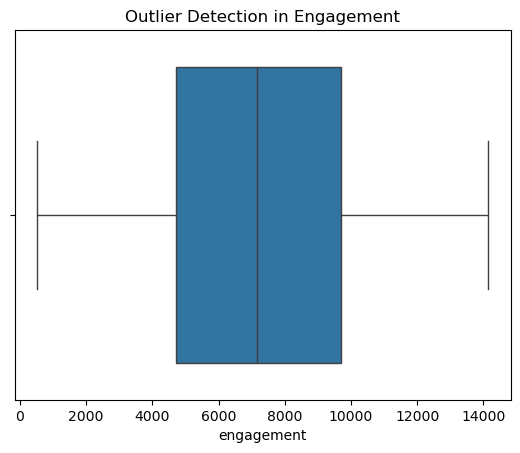

In [7]:
sns.boxplot(x=df["engagement"])
plt.title("Outlier Detection in Engagement")
plt.show()

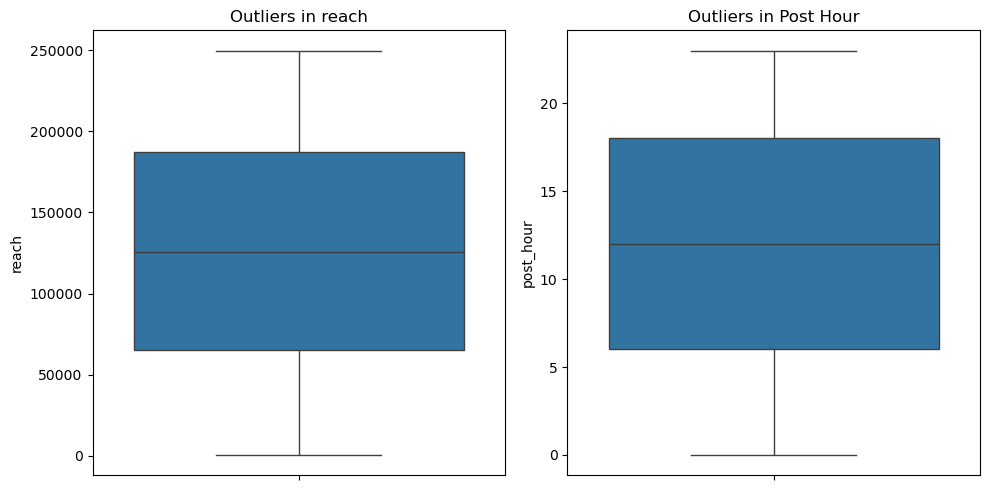

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))
sns.boxplot(y=df["reach"], ax=ax[0])
ax[0].set_title("Outliers in reach")

# Post hour outliers
sns.boxplot(y=df["post_hour"], ax=ax[1]) 
ax[1].set_title("Outliers in Post Hour")

plt.tight_layout()
plt.show()

In [9]:
df1=df.groupby("post_type")["engagement"].mean()
df1

post_type
Image    7568.925301
Reel     7089.163588
Story    7238.877751
Text     6883.383838
Video    7221.049875
Name: engagement, dtype: float64

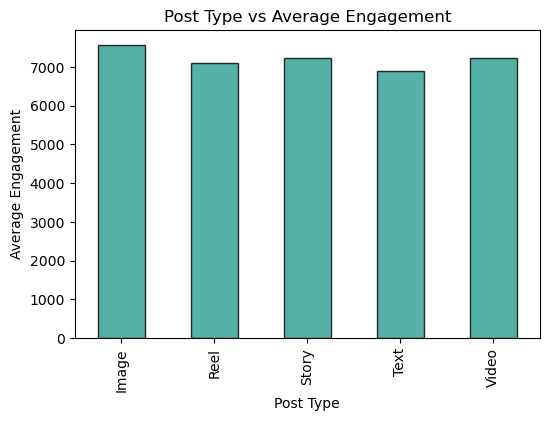

In [10]:
plt.figure(figsize=(6,4))
df1.plot(
    kind="bar",
    color="#2a9d8f",
    edgecolor="black",
    alpha=0.8
)
plt.xlabel("Post Type")
plt.ylabel("Average Engagement")
plt.title("Post Type vs Average Engagement")
plt.show()

In [1]:
df2=df.groupby("post_hour")["engagement"].sum()
df2

NameError: name 'df' is not defined

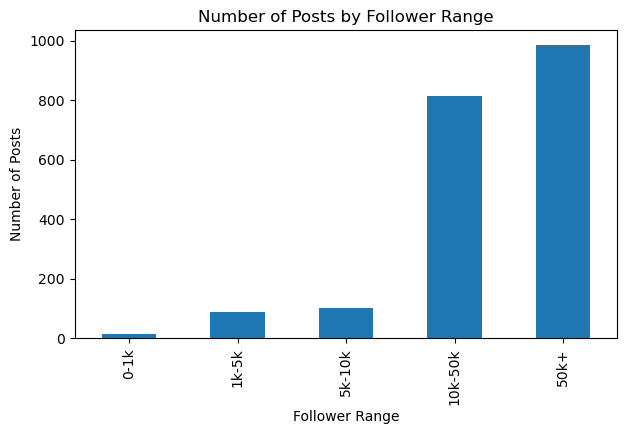

In [12]:
df['follower_group'] = pd.cut(
    df['followers'],
    bins=[0, 1000, 5000, 10000, 50000, 100000],
    labels=['0-1k', '1k-5k', '5k-10k', '10k-50k', '50k+']
)

bar_data = df['follower_group'].value_counts().sort_index()

plt.figure(figsize=(7,4))
bar_data.plot(kind='bar')
plt.xlabel("Follower Range")
plt.ylabel("Number of Posts")
plt.title("Number of Posts by Follower Range")
plt.show()

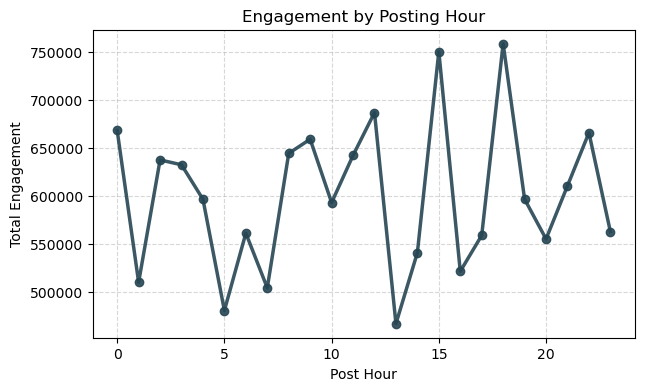

In [13]:
plt.figure(figsize=(7,4))
df2.plot(
    kind="line",
    color="#264653",
    marker="o",
    linewidth=2.5,
    alpha=0.9
)
plt.xlabel("Post Hour")
plt.ylabel("Total Engagement")
plt.title("Engagement by Posting Hour")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

In [14]:
df3=df.groupby("post_type")["reach"].sum()
df3

post_type
Image    49302398
Reel     48912333
Story    50298701
Text     48596759
Video    52530130
Name: reach, dtype: int64

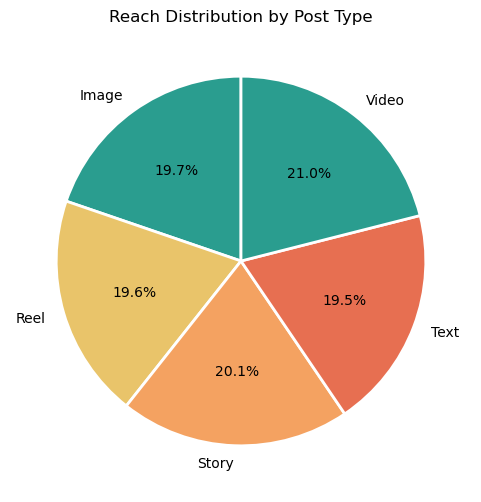

In [16]:
plt.figure(figsize=(6,6))
df3.plot(
    kind="pie",
    autopct="%1.1f%%",
    startangle=90,
    colors=["#2a9d8f", "#e9c46a", "#f4a261", "#e76f51"],
    wedgeprops={"edgecolor": "white", "linewidth": 2}
)
plt.ylabel("")
plt.title("Reach Distribution by Post Type")
plt.show()

In [17]:
df4=df[["reach","engagement"]]
df2.head()

post_hour
0    668397
1    510286
2    637713
3    632662
4    596752
Name: engagement, dtype: int64

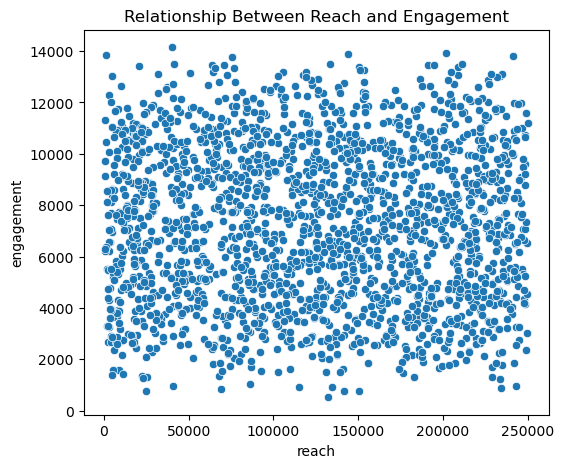

In [19]:
plt.figure(figsize=(6,5))
sns.scatterplot(x="reach",y="engagement",data=df4)
plt.title("Relationship Between Reach and Engagement")
plt.show()

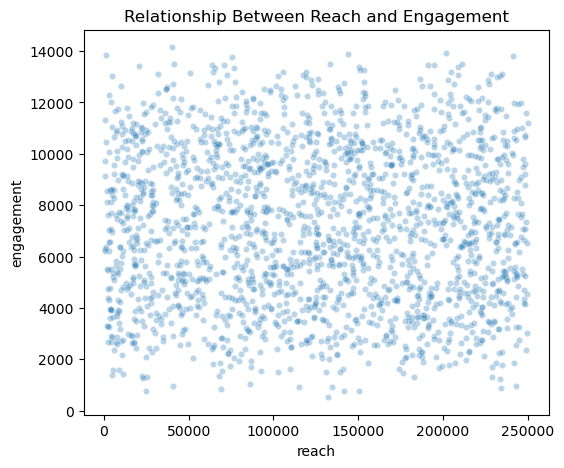

In [20]:
plt.figure(figsize=(6,5))
sns.scatterplot(
    x="reach",
    y="engagement",
    data=df4,
    s=20,          
    alpha=0.3     
)
plt.title("Relationship Between Reach and Engagement")
plt.show()

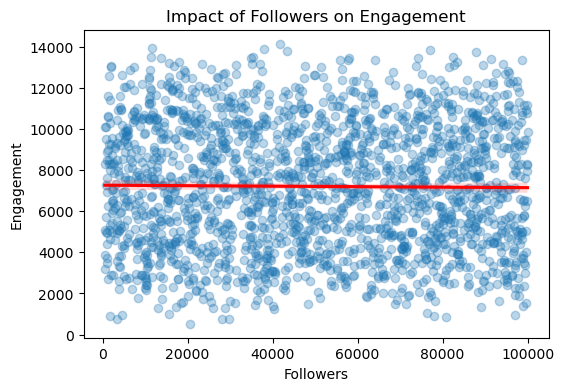

In [21]:
plt.figure(figsize=(6,4))
sns.regplot(
    x='followers',
    y='engagement',
    data=df,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'red'}
)
plt.xlabel("Followers")
plt.ylabel("Engagement")
plt.title("Impact of Followers on Engagement")
plt.show()

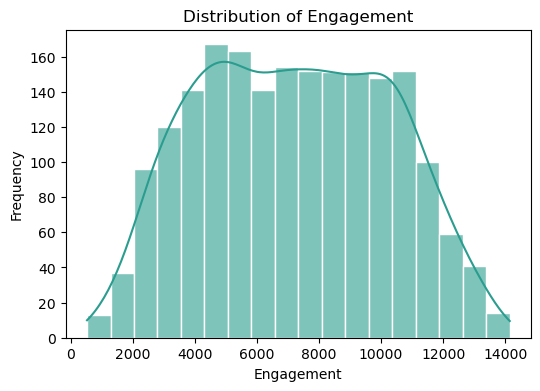

In [22]:
plt.figure(figsize=(6,4))
sns.histplot(
    df["engagement"],
    color="#2A9D8F",
    kde=True,
    alpha=0.6,
    edgecolor="white"
)
plt.title("Distribution of Engagement")
plt.xlabel("Engagement")
plt.ylabel("Frequency")
plt.show()

In [ ]:
#This analysis helped identify which post types and posting times generate higher engagement.
#The insights can be used to optimize content strategy and improve audience interaction on social media platforms.